Plot representative riverbed profiles on the infiltrability map

In [1]:
# Standard imports
import pathlib

# Third party imports
import numpy as np
import pandas as pd
import colorstamps

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.lines import Line2D

# Internal imports
import rosetta 
import utils

In [2]:
# set plot style
%matplotlib widget
plt.style.use('plot_style.txt')

# output path for figures 
output_path = pathlib.Path("/home/jonas/shared/Work/SSeep2026/Figures")

# set regime colors
c_negl = '#5a7cb0b3'
c_soft = '#e16e91b3'
c_hard = '#c9aa2ab3'

Compare van Genuchten unsaturated parameters used for near‐surface geological units in numerical simulations (compiled by Muñoz-Vega et al., https://doi.org/10.1029/2025WR040785) with sand and silt distributions obtained from Rosetta3.

In [3]:
# compiled data used in numerical simulations
munoz_data = pd.read_csv('munoz_unsat_ref.csv')

# synthetic distributions
N = 2000
sand = rosetta.get_sand(N)
silt = rosetta.get_silt(N)

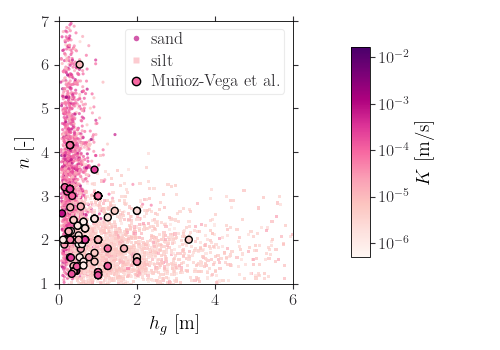

In [4]:
fig, ax = plt.subplots(figsize=(5, 3.5))

cmap = cm.RdPu
norm = colors.LogNorm()

ax.scatter(sand['hg'], sand['n'], c=sand['K'],
           cmap=cmap, norm=norm, marker='o', s=5, ec='None', alpha=0.7)
ax.scatter(silt['hg'], silt['n'], c=silt['K'],
           cmap=cmap, norm=norm, marker='s', s=5, ec='None', alpha=0.7)
ax.scatter(munoz_data['hg'], munoz_data['n'], c=munoz_data['K'],
           cmap=cmap, norm=norm, marker='o', s=25, ec='k', linewidths=1)

ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.tick_params(top=True, right=True)
ax.set(xscale='linear', yscale='linear')
ax.minorticks_off()

ax.set_xlim(xmin=0, xmax=6)
ax.set_ylim(ymin=1, ymax=7)
ax.set_xlabel('$h_g$ [m]', labelpad=5)
ax.set_ylabel('$n$ [-]', labelpad=5)

cax = ax.inset_axes([1.25, 0.1, 0.08, 0.8])
cb = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cax,
             orientation='vertical', label='$K$ [m/s]')
cb.minorticks_off()

legend = [
    Line2D([0], [0], color=cmap(0.7), ls='None', marker='o', ms=4, 
           markeredgecolor='None', alpha=0.7, label='sand'),
    Line2D([0], [0], color=cmap(0.3), ls='None', marker='s', ms=4,
           markeredgecolor='None', alpha=0.7, label='silt'),
    Line2D([0], [0], color=cmap(0.5), ls='None', marker='o', ms=6,
           alpha=1, label='Muñoz-Vega et al.')
]
plt.legend(handles=legend, loc='upper right', handlelength=1, handletextpad=0.4,
           fontsize=12)

plt.tight_layout()
plt.savefig(output_path / 'vG_parameter_dist.pdf')

Generate riverbed profiles:

    - with sandy or silty aquifer, 
    - with wc from Unif(0, 3) [m]
    - with Kc from LogUnif(1e-8, 1e-6) [m/s]

and plot them on the infiltrability map.

/tmp/ipykernel_149237/3513651834.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


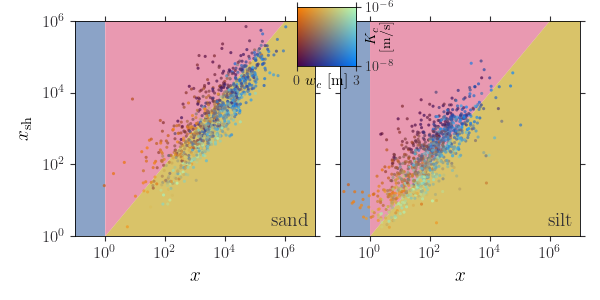

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

# generate riverbed profiles
N = 1000
sand = rosetta.get_sand(N)
silt = rosetta.get_silt(N)

cl_cond = 10**np.random.uniform(low=-8, high=-6, size=N)
cl_th = np.random.uniform(low=0, high=3, size=N)

# build 2d colormap
norm1 = colors.LogNorm(vmin=1e-8, vmax=1e-6)
norm2 = colors.Normalize(vmin=0, vmax=3)
rgb, stamp = colorstamps.apply_stamp(norm1(cl_cond), norm2(cl_th), 'teuling1f')

# scatter plot for sandy aquifer
_, _, _, x, x_sh = utils.get_Dless_parameters(cl_cond, cl_th, sand['K'],
                                                sand['hg'], sand['n'], 'vGM')
axs[0].scatter(x, x_sh, c=rgb, marker='o', s=5, ec='None', alpha=0.7, zorder=1)

# scatter plot for silty aquifer
_, _, _, x, x_sh = utils.get_Dless_parameters(cl_cond, cl_th, silt['K'],
                                                silt['hg'], silt['n'], 'vGM')
axs[1].scatter(x, x_sh, c=rgb, marker='o', s=5, ec='None', alpha=0.7, zorder=1)

# background with the regimes
for ax in axs:
    ax.fill_betweenx([1e0, 1e6], [1e-2, 1e-2], x2=[1e0, 1e0], color=c_negl,
                     ec='None', zorder=0)
    ax.fill_between([1e0, 1e10], [1e0, 1e10], y2=[1e10, 1e10], color=c_soft,
                    ec='None', zorder=0)
    ax.fill_between([1e0, 1e10], [1e0, 1e0], y2=[1e0, 1e10], color=c_hard,
                    ec='None', zorder=0)

for ax in axs:
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.tick_params(top=True, right=True)
    ax.set(xscale='log', yscale='log')
    ax.minorticks_off()
    ax.set_xlabel('$x$', labelpad=5)
    ax.set_xlim(xmin=1e-1, xmax=1e7)
    ax.set_ylim(ymin=1e0, ymax=1e6)
    ax.set_yticks([1e0, 1e2, 1e4, 1e6], labels=[])
    ax.set_xticks([1e0, 1e2, 1e4, 1e6])

axs[0].set_ylabel('$x_\\mathrm{sh}$', labelpad=8)
axs[0].set_yticklabels(['$10^0$', '$10^2$', '$10^4$', '$10^6$'])

col_ax = stamp.overlay_ax(axs[0], lower_left_corner=[0.87, 1.05], width=0.28)
col_ax.spines["top"].set_visible(True)
col_ax.spines["right"].set_visible(True)
col_ax.tick_params(top=True, right=True)
col_ax.set_xlabel('$w_c$ [m]', labelpad=-10, fontsize=11)
col_ax.set_xticks([0, 1], labels=[0, 3], fontsize=10)
col_ax.set_ylabel('$K_c$\n[m/s]', labelpad=-20, fontsize=10, multialignment='center')
col_ax.set_yticks([0, 1], labels=['$10^{-8}$', '$10^{-6}$'], fontsize=10)
col_ax.yaxis.set_label_position("right")
col_ax.yaxis.tick_right()

axs[0].text(6e6, 2e0, 'sand', horizontalalignment='right', fontsize=14)
axs[1].text(6e6, 2e0, 'silt', horizontalalignment='right', fontsize=14)

plt.tight_layout()
plt.savefig(output_path / 'riverbed_profiles.pdf')